**Data-Driven Mall Customer Segmentation for Business Success**




**1. Abstract**

In today's highly competitive and technically advanced world Machine Learning is one of the important concepts in the software industry. Data is the heart for the organizations, and they have this data in huge numbers. And many of the companies are manually processing the data using repetitive tasks. By employing machine learning techniques, we can automate the tasks and reduce human effort. Customer mall data is huge in size, by processing the data we can analyze the behavioral pattern of the customers and take better decisions that would help the companies to implement their strategies. We used K-means algorithm to form the data into clusters. Our study gives stores useful information about how to divide customers into groups, which they can then use. Customers will be happier and your business will do better if you understand and meet their specific wants.


**2. Introduction**

Technology is increasing daily and seeing rapid growth. Software Development has always been one of the most in demand domains in the IT (Information Technology) industry. Most of the organizations will have to deal with data. Sometimes, this data could be in small numbers, sometimes the size of this data would be tremendous[1]. Companies need to find an efficient way to deal with this data. With this need, if we combine technology, the result would be something like Machine Learning. Machine Learning and Artificial Intelligence is one of the technologically advanced software engineering techniques that would allow companies to reduce human effort and automate repetitive tasks[2].  

All that is needed is certain machine learning algorithms, and a proper data set which is accurate so that there would not be any anomalies. Unstructured data must be sorted and filtered out. It can further be categorized and depicted in the form of graphs such as histograms, bar graphs, heat maps. Data is everywhere, everything that is related to a software has some data associated with it and some need data[3]. This data is the heart for any machine learning algorithm to run. This data that is being used must be accurate or must be error free. If the data is corrupted or there are any errors, there might be anomalies which give us results that are not expected[4].

As mentioned earlier, everything that is associated with software has some or the other kind of data. In shopping malls, there are huge sets of data that are related to new features, offers, materials, and price of the item. Based on all these factors there would be a huge data set and if we filter this data and process it in a structured form and categorize and visualize them in the form of graphs and plots. This would give us huge advantages such as setting budgets, brand promotions, marketing, and customer satisfaction, which is the focus to gain new customers and to retain previous ones[5].

We can achieve this by using Machine Learning Technologies, such as K-Means clustering Algorithm. By employing machine learning techniques, we can eliminate manual segmentation[6]. It also allows us to retrain the model with the new data acquired, which would increase its efficiency and performance. Our data set consists of almost 24000 datasets that would allow us to train and test our model to achieve accurate values. K-means clustering can be used when we have data that is unlabeled. We must find an accurate number of clusters, through which we can visualize the result.

**Literature Review:**

We have used IEEE and ACM Libraries, which are very renowned, to search for research papers based on data segmentation using machine learning techniques. The key search terms that were used to search for research papers are “Data Segmentation,” “K-means,” “Machine learning,” “Customer Data.” By using these search terms, we were able to filter out the results for unrelated papers and consider the ones which are closely related and directly associated with this paper.  

The authors of the papers that were referred, mentioned in detail such as if there is an increase in customer retention of 5%, there would be an increase in the profits of twenty-five percent[7]. They also mentioned that by analyzing customers' behavior, that would help understand the business well. K means algorithm can be used to solve large scale datasets and simplify them. This data would in turn be helpful in visualizing the data[8]. The author also states another customer segmentation study which involved online customers for a store. This had a dataset of 196 online customers. This study was conducted in Korea. If a dataset or a customer ends up in both training and testing models, then it is determined for the customer[9].  

Many other models were proposed, but K-means is one of the most important sought-after models used to cluster the datasets and visualize the data which helps segment or categorize the data[10].

**3. Data Collection/Cleaning/Processing/Description:**



  This is the [link](https://docs.google.com/spreadsheets/d/1KAAjTC6rrcrPvP2HLeUV5OvZnUUqlu-Y6J6a_8IR0So/edit?usp=sharing) to the dataset. We have found this dataset online after searching through so many popular websites like Kaggle and other repositories but there are no datasets over thousands of rows. So the credibility of this dataset cannot be promised. But the steps we performed on the dataset are prominent.

In [ ]:
#importing the required libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,StandardScaler,MinMaxScaler

In [ ]:
#Reading the data from the dataset
customer_data = pd.read_csv("customer_segmentation_data.csv")

In [ ]:
#The first five rows of the dataset
customer_data.head()

,customer_id,products_purchased,complains,money_spent
0,1000661,1,0,260.0
1,1001914,1,0,790.2
2,1002167,3,0,234.2
3,1002387,1,0,890.0
4,1002419,2,0,103.0


In [ ]:
#Total number of rows
customer_data.shape

(24000, 4)

In [ ]:
#The information about the features in the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         24000 non-null  int64  
 1   products_purchased  24000 non-null  int64  
 2   complains           24000 non-null  int64  
 3   money_spent         24000 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 750.1 KB


In [ ]:
#Describing the dataset
customer_data.describe()

,customer_id,products_purchased,complains,money_spent
count,2.400000e+04,24000.000000,24000.000000,24000.000000
mean,1.001908e+06,1.600000,0.010000,456.830000
std,6.489202e+02,0.800017,0.117901,320.704042
min,1.000660e+06,1.000000,0.000000,102.000000
25%,1.001913e+06,1.000000,0.000000,233.700000
50%,1.002166e+06,1.000000,0.000000,260.500000
75%,1.002387e+06,2.000000,0.000000,793.200000
max,1.002419e+06,3.000000,2.000000,894.000000


In [ ]:
#Checking for null values
customer_data.isnull().sum()

customer_id           0
products_purchased    0
complains             0
money_spent           0
dtype: int64

In [ ]:
#dropping the customer_id column
processed_customer_data = customer_data.drop(["customer_id"], axis=1)

In [ ]:
#Final processed dataset
processed_customer_data

,products_purchased,complains,money_spent
0,1,0,260.0
1,1,0,790.2
2,3,0,234.2
3,1,0,890.0
4,2,0,103.0
...,...,...,...
23995,1,0,263.0
23996,1,1,799.2
23997,3,0,235.2
23998,1,0,894.0


As we can see from the above outputs all the columns are numerical and there is no missing data. ***'customer_id'*** is often used as an identifier for customers and might not be directly informative for clustering, as clustering algorithms typically work with feature vectors that represent characteristics or behaviors of the entities being clustered. So the customer_id feature is dropped. This is part of data preprocessing. The data is cleaned and processed.

4. It is important to see a 3-featured dataframe before clustering in order to understand how the data points are distributed and find possible trends or groups. It can be hard to see 3D data directly, but there are a number of ways to describe the data well and learn more about it before using clustering algorithms.
  
  **Pairwise Scatter Plots:** Make a scatter plot for each pair of traits to see how they are connected. This can help you find patterns, trends, and possible groups in the data.
  
  In this dataset we have three features namely products_purchased it has only values 1,2 and 3, complains feature has 3 values 0,1 and 2. money_spent feature is between 102 and 894. By using the below pairplot graph we can observe the connection between the features.

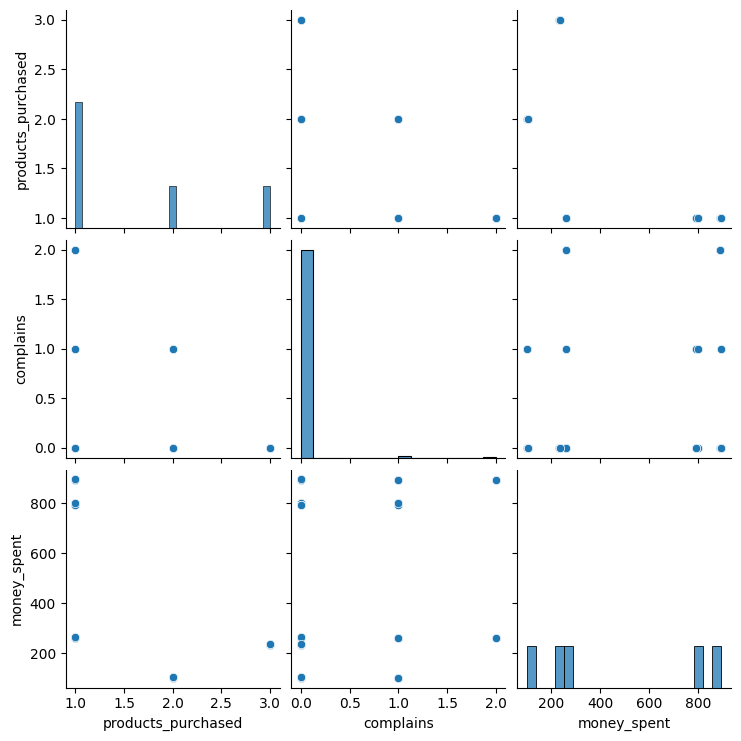

In [ ]:
#sns.set(style="whitegrid")

sns.pairplot(processed_customer_data)
#plt.suptitle("Pairwise Relationships for Mall Customer Data", y=1.02)
plt.show()

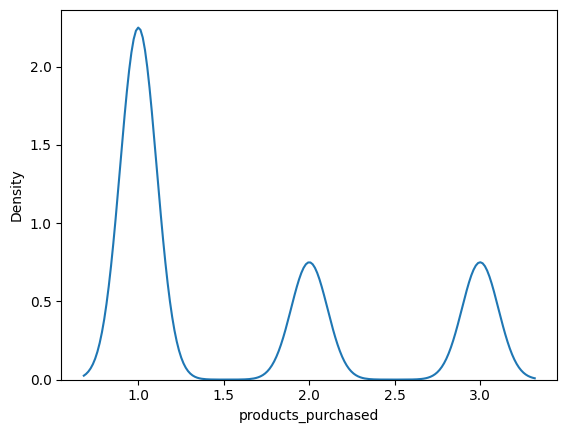

In [ ]:
sns.kdeplot(processed_customer_data['products_purchased'])
plt.show()

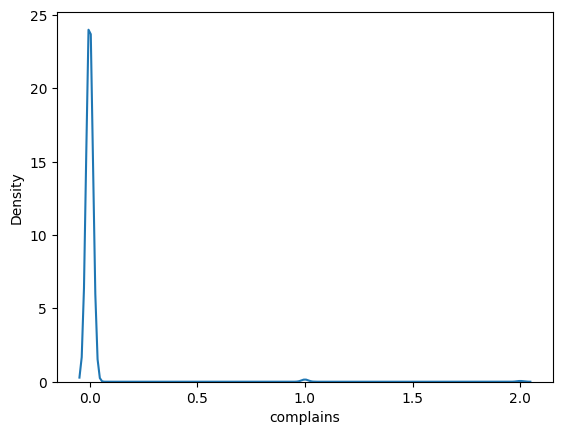

In [ ]:
sns.kdeplot(processed_customer_data['complains'])
plt.show()

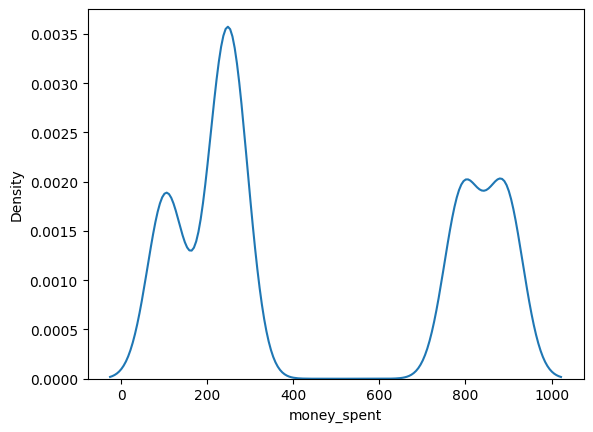

In [ ]:
sns.kdeplot(processed_customer_data['money_spent'])
plt.show()

**Research Question:**
How can mall customers be effectively segmented based on their purchasing behavior, complaint history, and money spent, and how might these segments contribute to business success?

**Hypothesis:**
We hypothesize that there are distinct customer segments within the mall population that exhibit different purchasing behaviors, complaint tendencies, and spending patterns. By identifying and targeting these segments with tailored marketing strategies and improved customer service, the mall can enhance customer satisfaction, loyalty, and overall business success.

For visualizing the segmented customer data after processing, a suitable choice could be a 2D Scatter Plot Matrix. This type of plot allows us to visualize pairwise relationships between features. This code will create a pair plot without coloring the points by cluster. Each point represents a customer, and you can observe the relationships between features without considering cluster assignments. This visualization can help identify patterns and relationships in the data before applying clustering.

5. The suitable Machine Learning model for this problem is K-Means clustering because it is a predicting a category problem and it doesnot have labeled data and sample size is greater than 10K.
  
  We have initialized a KMeans model using the 'k-means++' initialization, a maximum of 400 iterations, and a fixed random state of 42. This is a common way to initialize and configure a KMeans model in scikit-learn.

  



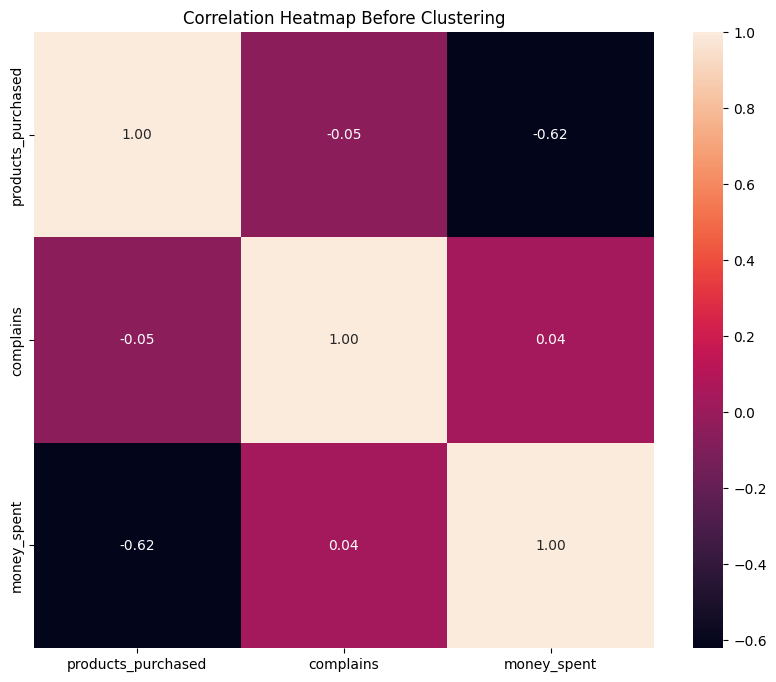

In [ ]:
#correlation matrix for the customer data
correlation_matrix = processed_customer_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap Before Clustering')
plt.show()


The numerical values in the heatmap indicate the correlation coefficients, and the color of each box is typically used to provide a visual representation of the correlation strength.
Positive correlations indicate, for example, that customers who purchase more products also tend to spend more money.
Negative correlations might suggest that customers who complain more tend to spend less money.

In [ ]:
# Defining the K-means model with initialising and number of iterations and random state
model = KMeans(init='k-means++',  max_iter=400, random_state=42)

In [ ]:
# Training the model with the processed dataset
model.fit(processed_customer_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=400, random_state=42)

In [ ]:
# Creating the K-means model for different cluster values(k)
def clusters_find(k, df):
    values = list(range(1, k+1))
    inertias=[]
    for i in values:
        model = KMeans(n_clusters = i,init='k-means++',max_iter=400,random_state=42)
        model.fit(df)
        inertias.append(model.inertia_)
    return inertias



In [ ]:
# Finding output for cluster k values between 1 and 15
outputs = clusters_find(15, processed_customer_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
outputs

[2468338823.999942,
 91864167.20000076,
 25301445.180002093,
 1755278.9399998146,
 117032.40000000749,
 49432.24000000187,
 32532.24000000182,
 25032.119999999803,
 16931.479999999272,
 10531.119999999979,
 5531.120000000135,
 3730.8000000000316,
 2930.7199999999066,
 2130.720000000008,
 1530.4800000000282]

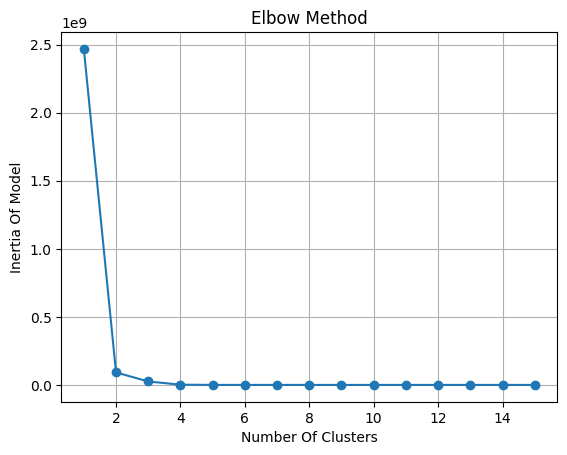

In [ ]:
#Using the elbow method find the optimal value of k
plt.plot(range(1,16),outputs, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number Of Clusters")
plt.ylabel("Inertia Of Model")
plt.grid(True)
plt.show()

As we can see from the graph that after 4 the decrease is at a much slower rate. So the optimal k value is 4. So we need to retrain the model with the cluster value 4.

In [ ]:
#retraining the model with cluster value 4
new_model = KMeans(n_clusters = 4,init='k-means++',max_iter=400,random_state=42)

new_model.fit_predict(processed_customer_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 1, 3, ..., 3, 2, 0], dtype=int32)

In [ ]:
# Creating data arrays so that the data can be added to a cluster
centers = new_model.cluster_centers_
d = np.expm1(centers)
points = np.append(d, centers, axis=1)
print(points)

[[6.38905610e+000 5.01252086e-003 1.14301649e+045 2.00000000e+000
  5.00000000e-003 1.03750000e+002]
 [1.71828183e+000 1.00501671e-002             inf 1.00000000e+000
  1.00000000e-002 7.92700000e+002]
 [1.71828183e+000 2.02013400e-002             inf 1.00000000e+000
  2.00000000e-002 8.91750000e+002]
 [6.38905610e+000 7.52819544e-003 4.94508943e+107 2.00000000e+000
  7.50000000e-003 2.47975000e+002]]


<ipython-input-22-40b2a13ecc3b>:3: RuntimeWarning: overflow encountered in expm1
  d = np.expm1(centers)


In [ ]:
# Adding the feature cluster to processed customer data
points = np.append(points, [[0], [1], [2], [3]], axis=1)
processed_customer_data["clusters"] = new_model.labels_

In [ ]:
processed_customer_data.head()

,products_purchased,complains,money_spent,clusters
0,1,0,260.0,3
1,1,0,790.2,1
2,3,0,234.2,3
3,1,0,890.0,2
4,2,0,103.0,0


**6. Results:**
Our analysis aimed to understand customer behavior in a retail setting. The results reveal distinct customer segments based on their purchasing patterns, complaint history, and spending habits. Elbow method is used for finding Optimal Cluster Number, highlighting the point of inflection around k=4, indicating an optimal number of clusters.


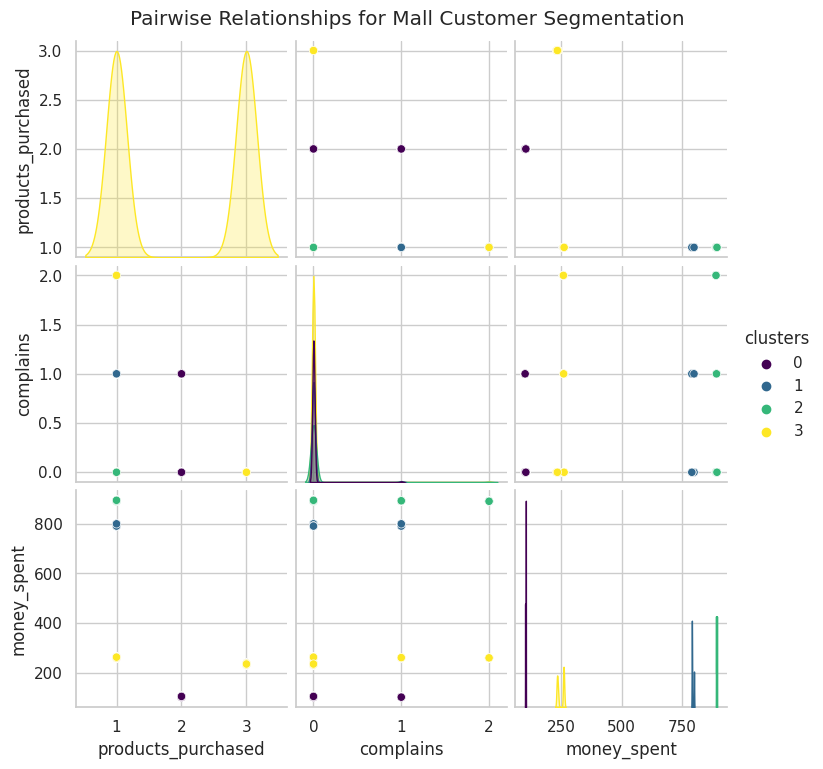

In [ ]:
sns.set(style="whitegrid")
sns.pairplot(processed_customer_data, hue='clusters', palette='viridis')
plt.suptitle("Pairwise Relationships for Mall Customer Segmentation", y=1.02)
plt.show()

In [ ]:
# visualizing the clusters
figure = px.scatter_3d(processed_customer_data,
                    color='clusters',
                    x="products_purchased",
                    y="complains",
                    z="money_spent",
                    category_orders = {"clusters": ["0", "1", "2", "3"]}
                    )
figure.update_layout()
figure.show()

Cluster 0: Customers who spend less and rarely file complaints.

Cluster 1: Customers with moderate spending habits and a higher likelihood of complaints.

Cluster 2: Customers who spend significantly and have low complaint rates.

Cluster 3: Customers with high complaint rates and moderate spending.

The cluster 2 has exhibited a positive correlation between high spending and low complaint rates, suggesting a segment of valuable, satisfied customers.

**Conclusion:**

The found clusters give us useful information about how customers behave, which lets us make more focused marketing plans and make customers satisfied. Limitations include the fact that correlation analysis assumes linearity and that exceptions could have an effect. Also, the study is based on a small selection of data that doesn't include all the factors that were looked at and might not show how customer behaviour has changed over time.
Analysis has shown that customer happiness and spending are closely connected. It matches what we found. The groups that were found give us more information than just "high spenders" and "low spenders." Retailers can make their marketing efforts fit the wants and concerns of each cluster. This method might make customers more loyal and make the best use of resources.
The futureof this analysis is to look into more traits or demographic information to get a fuller picture of different types of customers. Latitudinal studies may also show how customers' behaviour changes over time.



**REFERENCES**

[1] N. S. Ayyıldız, A. Akçay, B. Yalçuva, A. Sayar, S. Ertuğrul and T. Çakar, "Segmentation for Factoring Customers: Using Unsupervised Machine Learning Algorithms," 2023 Innovations in Intelligent Systems and Applications Conference (ASYU), Sivas, Turkiye, 2023, pp. 1-7, doi: 10.1109/ASYU58738.2023.10296639.

[2] P. Balakrishnan, M. C. Cooper, V. S. Jacob and P. A. Lewis, "Comparative performance of the FSCL neural net and K-means algorithm for market segmentation", European Journal of Operational Research, pp. 346-357, 1996.

[3] U. F. P. Bradley, "Refining Initial Points for K-Means Clustering", International Conference on Machine Learning, 1998.

[4] H. Zhexue, "Extensions to the k-Means Algorithm for Clustering Large Data Sets with Categorical Values", Data Mining and Knowledge Discovery, vol. 2, pp. 283-304, 1998.

[5] D. Pelleg and A. Moore, "X-means: Extending k-means with efficient estimation of the number of clusters", 2000.

[6] T. Hong and E. Kim, "Segmenting customers in online stores based on factors that affect the customer’s intention to purchase", Expert Systems with Applications, vol. 39, pp. 2127-2131, 2012.

[7] P.-N. Tan, S. Michael, A. Karpatne and V. Kumar, "Cluster Analysis: Basic Concepts and Algorithms", Introduction to Data Mining, pp. 535, 525-612, 2018.

[8] P. Berkhin, "Survey of Clustering Data Mining Techniques", 2002.

[9] H.-H. Bock, "A History of k-Means Algorithms", Clustering Methods.

[10] D. Marutho, S. H. Handaka, E. Wijaya and Muljono, "The Determination of Cluster Number at k-mean using Elbow Method and Purity Evaluation on Headline News", International Seminar on Application for Technology of Information and Communication, 2018.